In [1]:
import numpy as np
import matplotlib.pyplot as plt

random_seed = 1014 
np.random.seed(random_seed)

In [2]:
# Initalize environment
# DO NOT MODIFY THIS CELL
nr_of_states = 10
nr_of_actions = 3

states = list(range(0,nr_of_states))
actions = list(range(0,nr_of_actions))

# Initialize transition_probability_matrix
transition_probability_matrix = np.zeros((nr_of_states,nr_of_states,nr_of_actions))

for action_id in range(nr_of_actions):
    for i,tpr in enumerate(transition_probability_matrix[:,:,action_id]):
        choosen_indexes = np.random.choice(nr_of_states, 3, replace=False)
        random_probs = np.random.random(3)    
        random_sum = sum(random_probs)
        random_probs = [i/random_sum for i in random_probs]
        
        for j, k in enumerate(choosen_indexes):
            tpr[k] = random_probs[j]

rewards = np.random.randint(0,100,(nr_of_states,nr_of_actions))

In [3]:
# DO NOT MODIFY THIS CELL
def step(state, action):   
    new_state = np.random.choice(nr_of_states, 1, p=transition_probability_matrix[state,:,action])[0]
    reward = rewards[state, action]    
    return new_state, reward

Q learning

In [4]:
def q_learning(alfa):
  q_table = np.random.randint(10, size=(10, 3))
  total_rewards_episode = []
  total_rewards_mean = []
  for i in range(1000):
    episode_r = 0
    state = 0
    for j in range(99):
      reward = 0
      action = np.argmax(q_table[state,:])
      next_state, reward = step(state,action)
      q_table[state,action] = (1-alfa)*q_table[state,action] + alfa*(reward+0.8*np.max(q_table[next_state,:])-q_table[state,action])
      episode_r += reward
      state = next_state
    total_rewards_episode.append(episode_r)
    total_rewards_mean.append(sum(total_rewards_episode)/(i+1))
  return total_rewards_mean


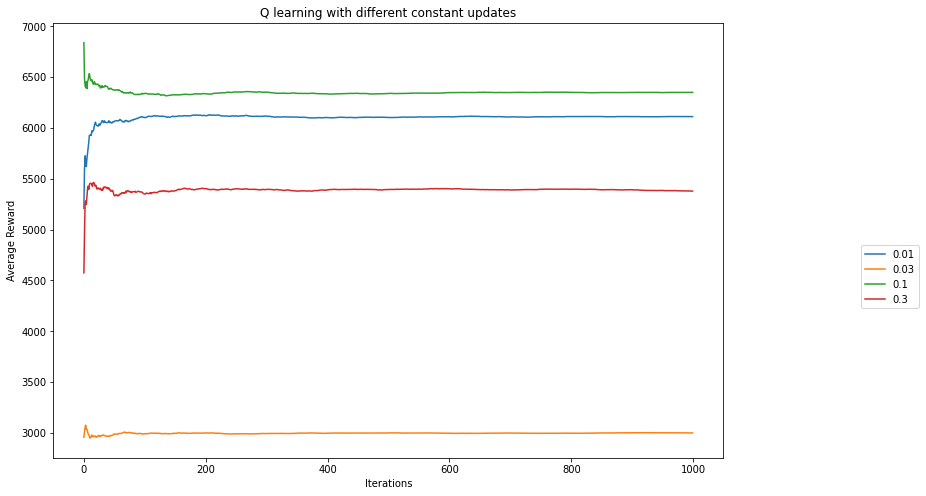

In [5]:
alfa = [0.01, 0.03, 0.1, 0.3] # different constant updates
for i in alfa:
  if i == 0.01:
    result1 = q_learning(i)
  if i == 0.03:
    result2 = q_learning(i)
  if i == 0.1:
    result3 = q_learning(i)
  if i == 0.3:
    result4 = q_learning(i)
plt.figure(figsize=(12,8))
plt.plot(result1,label="0.01")
plt.plot(result2,label="0.03")
plt.plot(result3,label="0.1")
plt.plot(result4,label="0.3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Q learning with different constant updates")
plt.show() 

SARSA

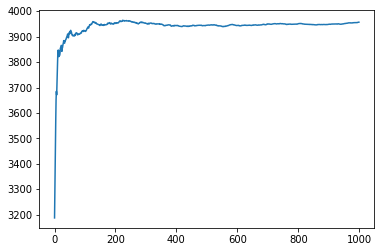

In [6]:
epsilon = 1/nr_of_actions # epsilon-greedy value
q_table = np.random.randint(10, size=(10, 3))
total_rewards_episodeS = []
total_rewards_meanS = []
for i in range(1000):
  episode_r = 0
  state = 0
  action = np.argmax(q_table[state,:])
  for j in range(99):
    reward = 0
    p = np.random.rand()
    if (p<epsilon):
      action = np.random.randint(1,nr_of_actions)
      next_state,reward = step(state,action)
    else:
      next_state, reward = step(state,action)
      next_action = np.argmax(q_table[next_state,:])
      q_table[state,action] = q_table[state,action] + 0.9*(reward+0.8*q_table[next_state,next_action]-q_table[state,action])
    episode_r += reward
    state = next_state
    action = next_action
  total_rewards_episodeS.append(episode_r)
  total_rewards_meanS.append(sum(total_rewards_episodeS)/(i+1))
plt.plot(total_rewards_meanS)
plt.show()

SARSA(lambda)

In [7]:
def sarsa_lambda(lambdas):
  epsilon = 1/nr_of_actions   # epsilon-greedy value
  q_table = np.random.randint(10, size=(10, 3))
  total_rewards_episodeL = []
  total_rewards_meanL = []
  for i in range(1000):
    E = np.zeros((nr_of_states,nr_of_actions))
    state = 0
    action = 0
    episode_rL = 0
    next_action= 0
    for j in range(99):
      p = np.random.rand()
      if (p<epsilon):
        action = np.random.randint(1,nr_of_actions)
        next_state,reward = step(state,action)
      else:
        next_state,reward = step(state,action)
        next_action = np.argmax(q_table[next_state,:])
        d = reward + 0.8*q_table[next_state,next_action] - q_table[state,action]
        E[state,action] = E[state,action] + 1
        for k in range(nr_of_states):
          for n in range(nr_of_actions):
            q_table[k,n] = q_table[k,n] + 0.9*d*E[k,n]
            E[k,n] = lambdas*E[k,n]
      episode_rL += reward
      state = next_state
      action = next_action
    total_rewards_episodeL.append(episode_rL)
    total_rewards_meanL.append(sum(total_rewards_episodeL)/(i+1))
  return total_rewards_meanL

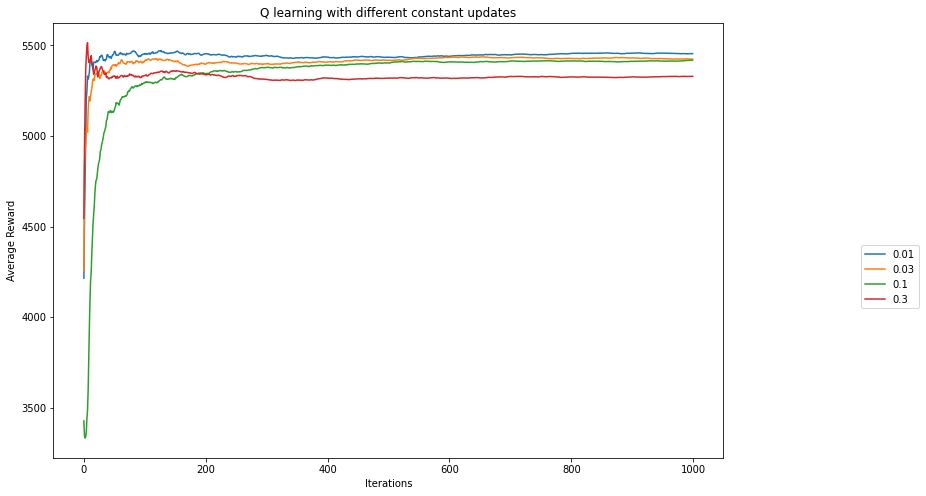

In [8]:
lambdas = [0.01, 0.03, 0.1, 0.3] # lambda values
for i in lambdas:
  if i == 0.01:
    resultL1 = sarsa_lambda(i)
  if i == 0.03:
    resultL2 = sarsa_lambda(i)
  if i == 0.1:
    resultL3 = sarsa_lambda(i)
  if i == 0.3:
    resultL4 = sarsa_lambda(i)
plt.figure(figsize=(12,8))
plt.plot(resultL1,label="0.01")
plt.plot(resultL2,label="0.03")
plt.plot(resultL3,label="0.1")
plt.plot(resultL4,label="0.3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Q learning with different constant updates")
plt.show()

Monte Carlo